In [1]:
import numpy as np
from qiskit import *
from qiskit.visualization import *

In [2]:
# Number of qubits in string
n_qubits = 8
# n_qubits = int(input('Enter number of qubits in the string: '))

# Get Alice's random string, Alice's basis, Bob's basis
alice_random_string = np.random.randint(2, size = n_qubits)

# Here basis are represented with a biniary number 
# Standard/Computational basis: 0, Hadamard basis: 1
alice_basis = np.random.randint(2, size = n_qubits)
bob_basis = np.random.randint(2, size = n_qubits)

print(alice_random_string)
print(alice_basis)
print(bob_basis)

[0 1 0 0 1 1 1 0]
[0 1 1 0 1 0 1 1]
[1 0 0 0 0 1 0 1]


### |0> No gate
### |1> X gate
### |+> H gate
### |-> HX gate

In [3]:
bb84_circuit = QuantumCircuit(n_qubits)

# Alice
for index in range(len(alice_random_string)):
    if alice_random_string[index] == 1:
        bb84_circuit.x(index)
    if alice_basis[index] == 1:
        bb84_circuit.h(index)
bb84_circuit.barrier()

# Bob
for index in range(len(bob_basis)):
    if bob_basis[index] == 1:
        bb84_circuit.h(index)

bb84_circuit.measure_all()

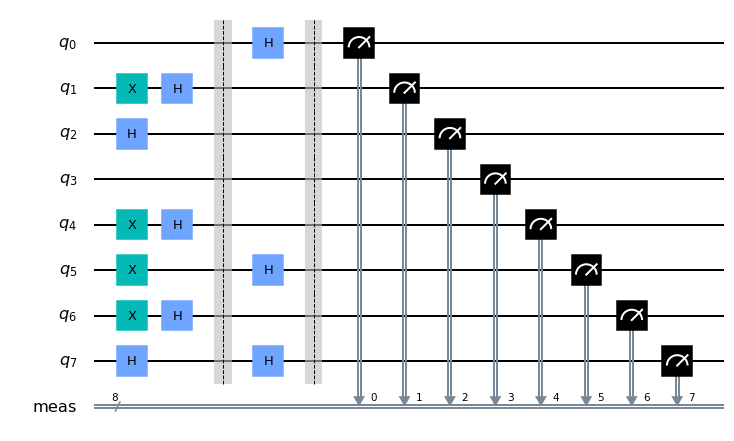

In [4]:
bb84_circuit.draw('mpl')

{'00101010': 1, '00101110': 2, '00000100': 2, '01000000': 1, '01100110': 1, '10000000': 1, '10100010': 1, '11000100': 1}


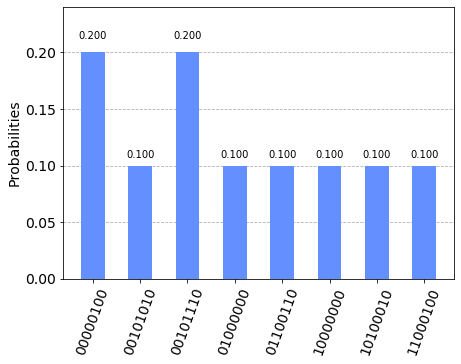

In [5]:
backend = Aer.get_backend('qasm_simulator')
execution = execute(experiments = bb84_circuit.reverse_bits(), backend = backend, shots = 10)    # Shots = 1
results = execution.result()
counts = results.get_counts()

# The counts here are the final qubit values that Bob gets after polarizing the photons through his choice of random basis! 
print(counts)
plot_histogram(counts)


# Quantum Communication through quantum channel ends here!

In [8]:
# Classical communication begins here!
# Creating the KEY!!!

# We need to compare the basis of Alice and Bob (alice_basis and bob_basis)

keys = []
for bob_key in counts:
    possible_key = ''
    for index in range(n_qubits):
        if alice_basis[index] == bob_basis[index]:
            possible_key = possible_key + str(bob_key[index])
        else:
            possible_key = possible_key + '-'
    print(possible_key)

    keys.append(possible_key)
    
#  CHECK!!!!! Error! ----->> Reverse order of qubits!!! Use reverse_bits() from qiskit version 0.20 

---0---0
---0---0
---0---0
---0---0
---0---0
---0---0
---0---0
---0---0


In [7]:
# Keys for every iteration the key remains the same as we do not change the basis! All 10 keys will be the same!
print(keys)

['---0---0', '---0---0', '---0---0', '---0---0', '---0---0', '---0---0', '---0---0', '---0---0']
